# Heuristic Model - fraud

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_afterpca.csv")

In [3]:
train_data = df.iloc[:, 1:8]
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.000277,-0.007366,-0.005802,-0.008016,-0.000140,-0.019152,0.001024
1,-0.010390,-0.008809,0.004091,-0.005157,0.006581,-0.011030,-0.001370
2,0.096099,0.203566,-0.032006,-0.032248,0.002193,-0.000888,-0.081251
3,0.015212,-0.025601,-0.018004,-0.022123,-0.056471,-0.025231,-0.063057
4,0.005910,-0.027515,-0.008770,-0.016263,0.001501,-0.034412,-0.014604


In [4]:
train = train_data.values

In [5]:
train.shape

(1070994, 7)

In [6]:
train = pd.DataFrame(train)

In [7]:
train.head()

,0,1,2,3,4,5,6
0,0.000277,-0.007366,-0.005802,-0.008016,-0.000140,-0.019152,0.001024
1,-0.010390,-0.008809,0.004091,-0.005157,0.006581,-0.011030,-0.001370
2,0.096099,0.203566,-0.032006,-0.032248,0.002193,-0.000888,-0.081251
3,0.015212,-0.025601,-0.018004,-0.022123,-0.056471,-0.025231,-0.063057
4,0.005910,-0.027515,-0.008770,-0.016263,0.001501,-0.034412,-0.014604


In [8]:
#Calculating Heuristic Z score for each record - Manhattan
manhattan = train.abs()
manhattan_score = manhattan.sum(axis = 1)
#manhattan_score

In [10]:
manhattan_score.shape

(1070994,)

In [11]:
#Calculating Heuristic Z score for each record - Euclidean
euclidean = ((train.abs())**2).sum(axis=1)
euclidean_score = euclidean**(1/2)
euclidean_score.shape

(1070994,)

In [12]:
#Creating DF
manhattan_score = pd.DataFrame(manhattan_score)
euclidean_score = pd.DataFrame(euclidean_score)
fraud_score_HU= pd.concat([manhattan_score,euclidean_score], axis=1)

fraud_score_HU.columns=['Manhattan_Hu_Score','Euclidean_Hu_Score']

In [13]:
fraud_score_HU.insert(0,'Record',fraud_score_HU.index+1)

In [16]:
fraud_score_HU.columns=['Record','Manhattan_Hu_Score','Euclidean_Hu_Score']

In [17]:
fraud_score_HU.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score
0,1,0.041778,0.022806
1,2,0.047428,0.019893
2,3,0.448251,0.243610
3,4,0.225698,0.097479
4,5,0.108974,0.050330


In [18]:
fraud_score_HU['Euclidean_Hu_Rank'] = fraud_score_HU['Euclidean_Hu_Score'].rank(ascending=1)
fraud_score_HU['Manhattan_Hu_Rank'] = fraud_score_HU['Manhattan_Hu_Score'].rank(ascending=1)

In [19]:
fraud_score_HU.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score,Euclidean_Hu_Rank,Manhattan_Hu_Rank
0,1,0.041778,0.022806,767259.0,448548.0
1,2,0.047428,0.019893,546563.0,671523.0
2,3,0.448251,0.243610,1059975.0,1057206.0
3,4,0.225698,0.097479,1036826.0,1040159.0
4,5,0.108974,0.050330,997471.5,1001392.5


In [20]:
fraud_score_HU.to_csv('fraud_ScoreAndRanks_HU.csv',index=False)

## Plotting

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


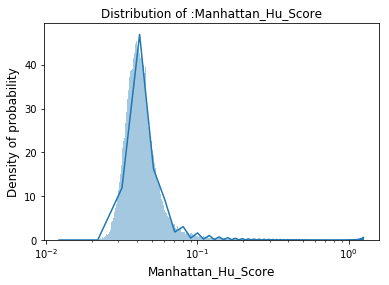

In [29]:
colName='Manhattan_Hu_Score'

xhigh =1.25
#sns.plt.xlim(0,xhigh)

#temp = fraud_score_HU
temp = fraud_score_HU[fraud_score_HU[colName] <= xhigh]


sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


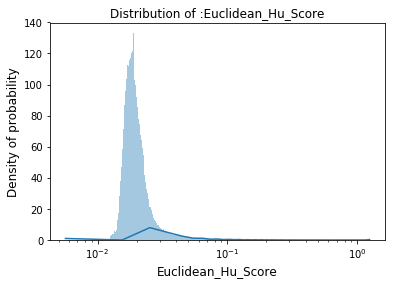

In [30]:
colName='Euclidean_Hu_Score'

xhigh =1.25
#sns.plt.xlim(0,xhigh)

#temp = fraud_score_HU
temp = fraud_score_HU[fraud_score_HU[colName] <= xhigh]


sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()